# Regression

Given training points $\boldsymbol{x}$, noisy targets $\boldsymbol{y}$, and domain $\boldsymbol{x}_*$, with $n$ the number of training points and $n_*$ the number of points in the domain, let $K(\boldsymbol{x},\space \boldsymbol{x_*})$ denote the $n \times n_*$ covariance matrix evaluated at all pairs of training and domain points.

To fit a GP, the following **predictive distribution** is computed:

$$
\begin{equation}
\boldsymbol{\mu_*} = K(\boldsymbol{x}_*, \boldsymbol{x})\left[{K(\boldsymbol{x}, \boldsymbol{x}) + \sigma_n^2I}\right]^{-1}\boldsymbol{y}
\end{equation}
$$

$$
\begin{equation}
K_* = K(\boldsymbol{x}_*, \boldsymbol{x}_*) - K(\boldsymbol{x}_*, \boldsymbol{x})\left[{K(\boldsymbol{x}, \boldsymbol{x}) + \sigma_n^2I}\right]^{-1}K(\boldsymbol{x}, \boldsymbol{x}_*)
\end{equation}
$$

giving the final predictive posterior:
$$
f(\boldsymbol{x}) \sim \mathcal{GP}(\boldsymbol{\mu_*},K_*)
$$

Let's look at this in action. I'll create an objective function, take noisy samples, then fit a GP.

The objective function:
$$
\begin{equation}
f(x) = \sin{x} + \cos^2{x}
\end{equation}
$$

I'll use the periodic kernel with hyperparameters $\ell=1$, $\sigma=1.1$, and $p=2\pi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dillinger.gaussian_process import GaussianProcess
from dillinger.kernel_functions import PeriodicKernel
%matplotlib inline

sns.set(font_scale=1.3, palette='deep', color_codes=True)
np.random.seed(0)

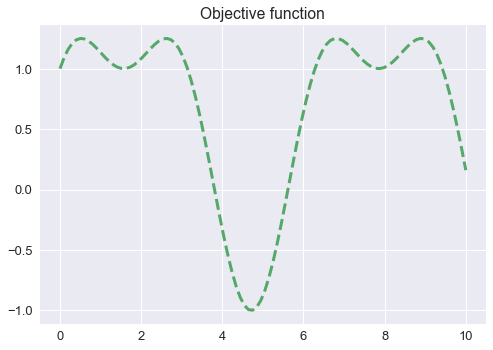

In [2]:
# setting up the objective function
def objective_func(x):
    return np.sin(x) + np.cos(x)**2

n_training_points = 10
x = np.linspace(0, 10, 100)
y_true = objective_func(x)
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g')
plt.title('Objective function');

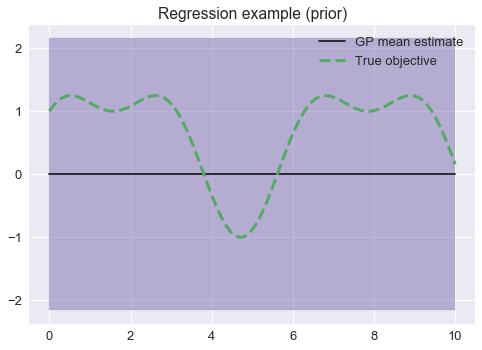

In [3]:
# plot the prior
GP = GaussianProcess(x, noise = .3, kernel_function='periodic', kernel_args={'ell': 1, 'p': np.pi*2, 'sigma': 1.1})
GP.plot()
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g', label='True objective')
plt.legend()
plt.title('Regression example (prior)');

The plot of the GP shows the mean in black, along with confidence intervals in purple. The plot above shows a blank prior.

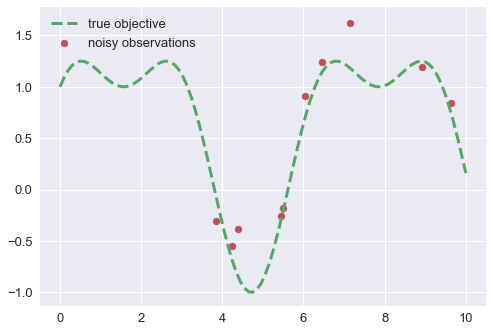

In [4]:
# create random observations with noisy targets
x_train = 10*np.random.rand(n_training_points)
y_train = objective_func(x_train) + .3*np.random.randn(n_training_points)
x_train.shape = -1, 1
y_train.shape = -1, 1
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g', label='true objective')
plt.scatter(x_train, y_train, c='r', label='noisy observations')
plt.legend();

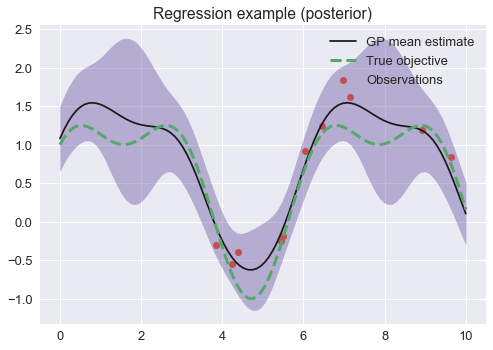

In [5]:
# and the posterior
GP.fit(x_train, y_train)
GP.plot()
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g', label='True objective')
plt.legend()
plt.title('Regression example (posterior)');

The model object remembers data points it's already seen, so it's easy to continue to make observations and fit the posterior.

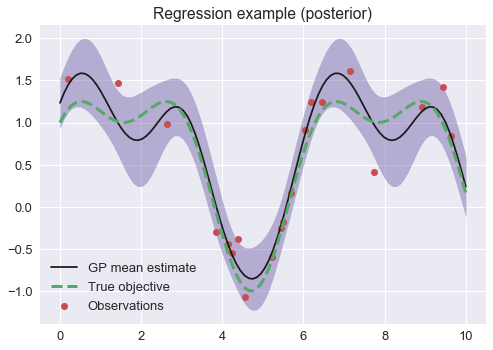

In [6]:
# perform more function evals and update the GP
x_train_new = 10*np.random.rand(n_training_points)
y_train_new = objective_func(x_train_new) + .3*np.random.randn(n_training_points)
x_train_new.shape = -1, 1
y_train_new.shape = -1, 1

# simply call the fit method again and pass in the new data points
GP.fit(x_train_new, y_train_new)
GP.plot()
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g', label='True objective')
plt.legend()
plt.title('Regression example (posterior)');

## Kernel Hyperparameters

If you have an idea of what hyperparameters you'd like, you can pass these directly into the GP, as in the obove example

In [7]:
GP = GaussianProcess(x, kernel_function='periodic', kernel_args={'ell': 1, 'p': np.pi*2, 'sigma': 1.1})

If you are using the Squared Exponential or Periodic kernels, there is support for automatic hyperparameter selection:

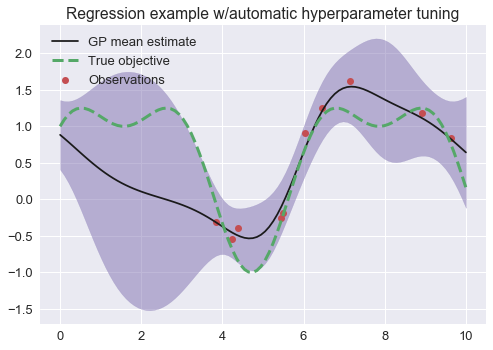

In [8]:
kernel = PeriodicKernel
GP = GaussianProcess(x, noise=.3, kernel_function=kernel)

GP.fit(x_train, y_train)
GP.plot()
plt.plot(x, y_true, linestyle='dashed', linewidth=3, c='g', label='True objective')
plt.legend()
plt.title('Regression example w/automatic hyperparameter tuning');

## References

* C. E. Rasmussen & C. K. I. Williams. *Gaussian Processes for Machine Learning*, the MIT Press, 2006,
ISBN 026218253X. c 2006 Massachusetts Institute of Technology. http://www.GaussianProcess.org/gpml